'../../data/planetary_engulfment_test15/' MESA solar-type star 1R 1M_sun, high floor denstiy and pressure


'../../data/planetary_engulfment_test27/' MESA solar-type star 1R 1M_sun, middle floor denstiy and pressure

'../../data/planetary_engulfment_test28/' MESA solar-type star 1R 1M_sun, middle floor denstiy and pressure and higher resolution

'../../data/planetary_engulfment_test29/' MESA solar-type star 1R 1M_sun, low floor denstiy and pressure

'../../data/planetary_engulfment_test34/' MESA solar-type star 1R 1M_sun, constant ambient density and pressure

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import athena_read as ar
import OrbitAnalysisUtils as ou
import Constants 

from mpl_toolkits.axes_grid1 import ImageGrid
from tqdm.auto import tqdm
#from skimage import measure

import scipy
from scipy.interpolate import RegularGridInterpolator
from scipy.special import expit
from athena_read import athdf

c=Constants.Constants()

%matplotlib inline


## reproducibility info
import reproducible
context = reproducible.Context()
context.add_cpu_info()
context.export_yaml('context.txt')


Constants defined...


'3b240e7b609a2c8beec901e77df0b9ab8ec205d58b7908099a58d56cfd93c558'

In [2]:
base_dir = '../../data/planetary_engulfment_test15/'
radius = 8.42e10
r_star = 8.42e10
t_dyn = (radius**3/c.G/c.msun)**0.5
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

reading orbit file for binary simulation...


reading orbit file for binary simulation...


<function matplotlib.pyplot.show(close=None, block=None)>

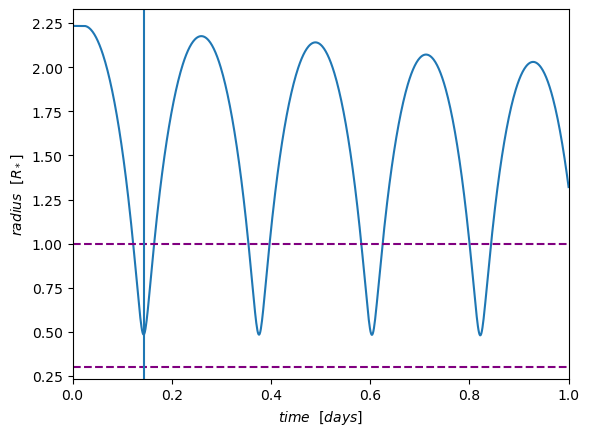

In [41]:
base_dir = '../../data/planetary_engulfment_test15/'
fig_mm = 1/25.4
Porb = 32.836*(86400)
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

radius = 8.42e10


#plot the orbit 
plt.plot(orb['time']/3600/24,orb['sep']/radius)
#plt.axvline(x=t_encounter/3600/24, color='g', linestyle='--')
#plt.axvline(x=t_leave/3600/24, color='g', linestyle='--')
plt.axhline(y=1, color='purple', linestyle='--')
plt.axhline(y=0.3, color='purple', linestyle='--')
plt.axvline(x=np.pi*(1.14e11**3/c.G/c.msun)**0.5/3600/24+2e3/3600/24)
plt.annotate('r=r_star', xy=(2, 1), xytext=(2, 1.22),
             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

#plt.annotate('first \n encounter', xy=(7000/3600/24, r_star/c.rsun), xytext=(-2000/3600/24, 4e10/c.rsun),
#             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

#plt.annotate('collision with core', xy=(110000/3600/24, r_min/c.rsun), xytext=(70000/3600/24, 3e10/c.rsun),
#             arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))
plt.ylabel('$radius \ \ [R_*]$')
plt.xlabel('$time \ \ [days]$')
plt.xlim(0,1)
plt.show

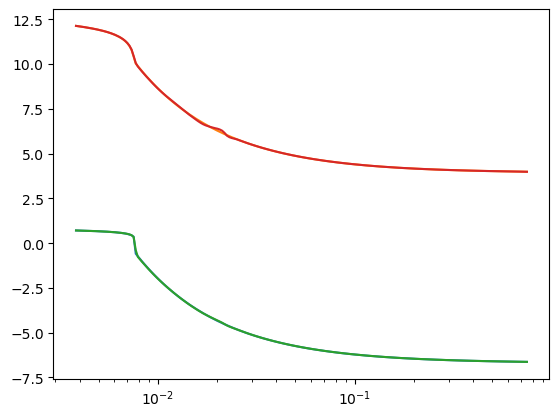

In [11]:
base_dir = '../../data/tde/'
data = athdf(base_dir+'/TDE.out1.00000.athdf')
gamma=1.66667
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho'])[0,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[0,0,:]))
data = athdf(base_dir+'/TDE.out4.00003.athdf')
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho'])[0,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[0,0,:]))
#plt.axvline(x=1)
plt.xscale('log')
plt.show()

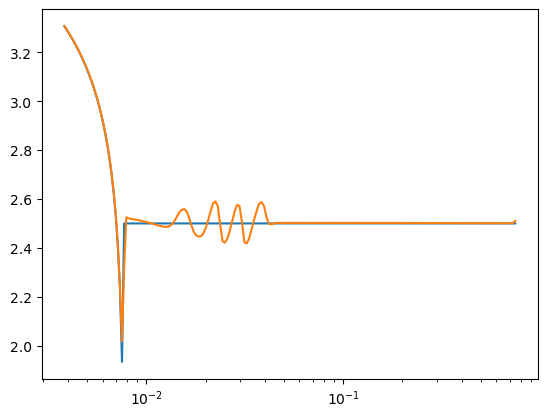

In [13]:
base_dir = '../../data/tde/'
data = athdf(base_dir+'/TDE.out1.00000.athdf')
gamma=1.66667
plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['rho'])[0,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['press'])[0,0,:]))
data = athdf(base_dir+'/TDE.out4.00006.athdf')
plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['rho'])[0,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['press'])[0,0,:]))
#plt.axvline(x=1)
plt.xscale('log')
plt.show()

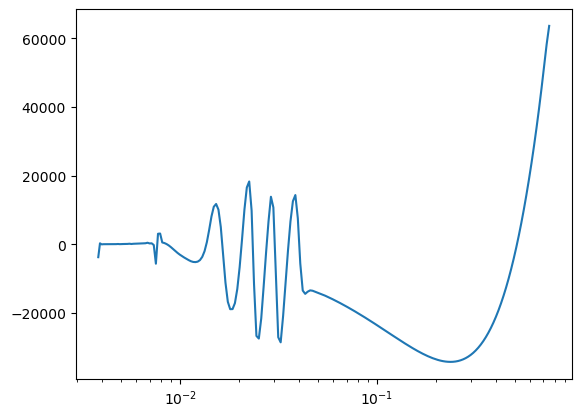

In [51]:
base_dir = '../../data/tde/'
data = athdf(base_dir+'/TDE.out4.00006.athdf')
plt.plot(data['x1v']/radius,data['vel1'][90,0,:])
plt.xscale('log')

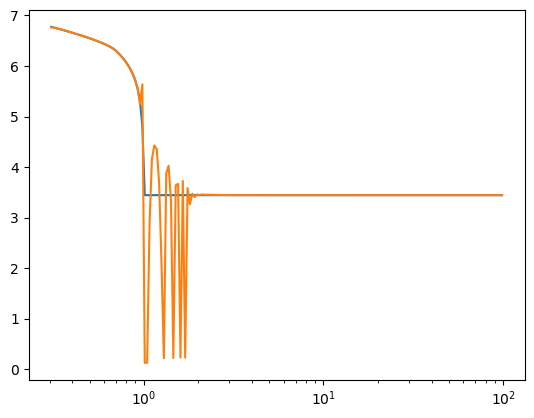

In [75]:
base_dir = '../../data/planetary_engulfment_test34/'
data = athdf(base_dir+'/PEGM.out1.00000.athdf')
gamma=1.66667
plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))
data = athdf(base_dir+'/PEGM.out1.00012.athdf')
plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))
#plt.axvline(x=1)
plt.xscale('log')
plt.show()

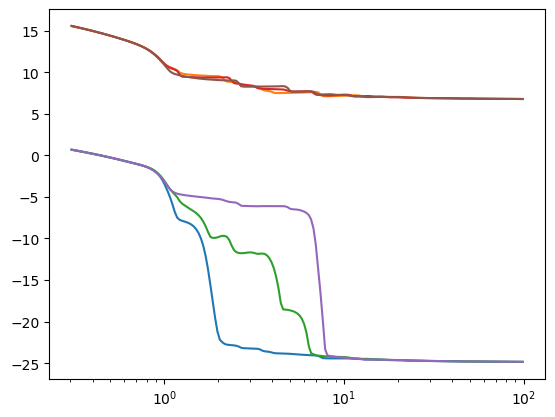

In [14]:
base_dir = '../../data/planetary_engulfment_test35/'
data = athdf(base_dir+'/PEGM.out1.00200.athdf')
gamma=1.66667
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho']*data['r0'])[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))
data = athdf(base_dir+'/PEGM.out1.00400.athdf')
gamma=1.66667
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho']*data['r0'])[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))
data = athdf(base_dir+'/PEGM.out1.00500.athdf')
#plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
plt.plot(data['x1v']/radius,np.log10((data['rho']*data['r0'])[0,45,:]))
plt.plot(data['x1v']/radius,np.log10((data['press'])[0,45,:]))
#plt.axvline(x=1)
plt.xscale('log')
plt.show()

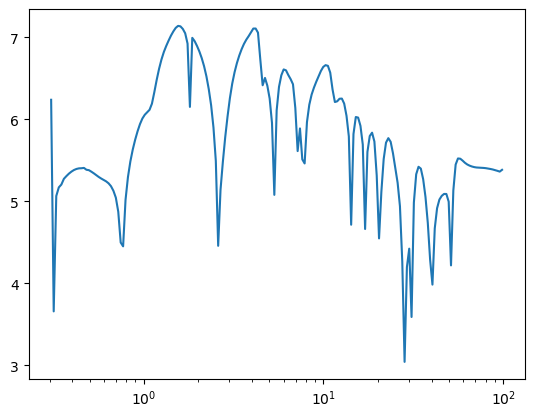

In [16]:
plt.plot(data['x1v']/radius,np.log10(abs(data['vel1'])[90,45,:]))
plt.xscale('log')

In [32]:
R = 1.0301528614336024
print((1-R)/(-299)*100)

0.010084569041338597


In [76]:
print(8.15/8.42)

0.9679334916864608


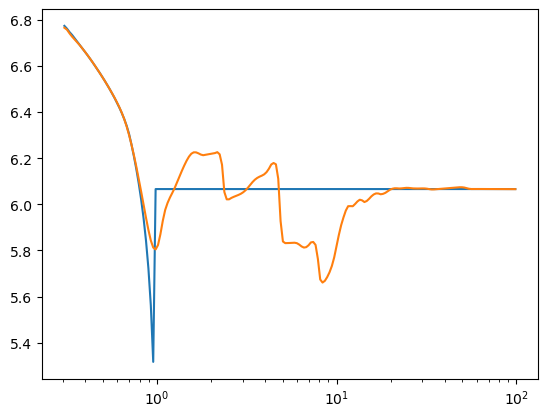

In [3]:
base_dir = '../../data/planetary_engulfment_test35/'
data = athdf(base_dir+'/PEGM.out1.00000.athdf')
gamma=1.66667
plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['rho'])[90,0,:]))
#plt.plot(data['x1v']/radius,np.log10((data['press'])[90,0,:]))

data = athdf(base_dir+'/PEGM.out1.00500.athdf')
plt.plot(data['x1v']/radius,np.log10((data['press']/data['rho']*c.mp*1.25/2/c.kB)[90,0,:]))

plt.xscale('log')
plt.show()

In [70]:
1.23e-7*4*np.pi/3*(100*radius)**3/c.msun

0.15463051848994808

In [69]:
np.sum((np.dot(np.sin(data['x2v']),np.sum(data['rho'],axis=0)*2*np.pi/np.shape(data['rho'])[0])*np.pi/np.shape(data['rho'])[1]*data['x1v']**2*(data['x1f'][1:]-data['x1f'][:-1]))[100:])/c.msun

0.0012772366623356565

reading orbit file for binary simulation...
tperi =  12403.12


(0.0, 10.0)

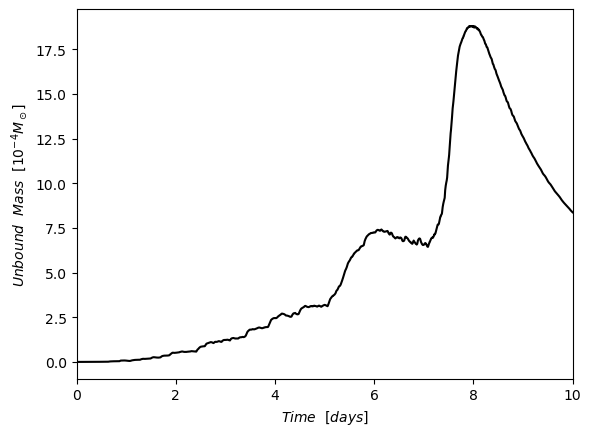

In [5]:

fig_mm = 1/25.4
Porb = 32.836*(86400)
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")

sel = (orb['time']>5000) & (orb['time']<15000)
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)
#plt.axvline(x=tperi/3600/24, color='r', linestyle='--')

# find the encounter time and the leaving time
r_star = 6.955e10
r_min = 2.31834e10
sel_left = (orb['time']>5000) & (orb['time']<tperi)
sel_right = (orb['time']<15000) & (orb['time']>tperi)

index_encounter = np.argmin(abs(orb[sel_left]['sep']-1.1*r_star))
index_leave = np.argmin(abs(orb[sel_right]['sep']-1.1*r_star))
t_encounter = orb[sel_left]['time'][index_encounter]
t_leave = orb[sel_right]['time'][index_leave]

#plot the orbit 
fig, ax = plt.subplots()
#ax = fig.add_subplot(111)
#ax2 = ax.twinx()

ax.plot(orb['time']/3600/24,orb['mu']/c.msun*10000,'b')
ax.get_lines()[0].set_color("black")

#ax2.plot(orb['time']/3600/24,orb['sep']/c.rsun,'r')
#plt.axvline(x=t_encounter/3600/24, color='g', linestyle='--')
#plt.axvline(x=t_leave/3600/24, color='g', linestyle='--')
#plt.axhline(y=r_star/c.rsun, color='purple', linestyle='--')
#plt.axhline(y=r_min/c.rsun, color='purple', linestyle='--')
#plt.annotate('r=r_star', xy=(70000/3600/24, r_star/c.rsun), xytext=(70000/3600/24, 1e11/c.rsun),
             #arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

#plt.annotate('first \n encounter', xy=(7000/3600/24, r_star/c.rsun), xytext=(-2000/3600/24, 4e10/c.rsun),
 #            arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))

#plt.annotate('collision with core', xy=(110000/3600/24, r_min/c.rsun), xytext=(70000/3600/24, 3e10/c.rsun),
 #            arrowprops=dict(facecolor='black', shrink=0.05,width=1,headwidth=5))
ax.set_ylabel('$Unbound \ \ Mass\ \ [10^{-4} M_\odot]$')
#ax.yaxis.label.set_color('red')
#ax2.spines['right'].set_color('red')
#ax2.tick_params(axis='y', colors='red')
#ax2.set_ylabel('$Radius \ \ [R_\odot]$')
#ax2.yaxis.label.set_color('red')
#ax2.spines['right'].set_color('blue')
#ax2.tick_params(axis='y', colors='blue')
ax.set_xlabel('$Time \ \ [days]$')
ax.set_xlim(0,10)


reading orbit file for binary simulation...
tperi =  651600.3
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00100.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00300.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00500.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00700.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00900.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.01100.ath

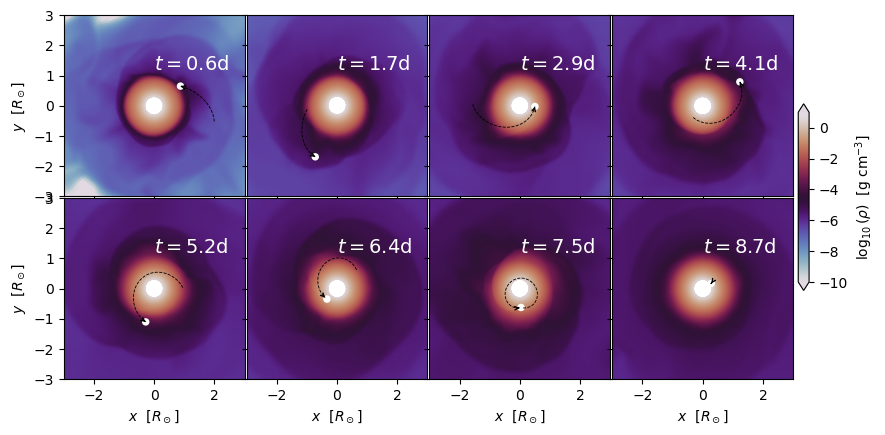

In [4]:

fig_mm = 1/25.4 #figure size
Porb = 32.836*(86400)/50  # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>0) & (orb['time']<95000000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = []
start_id = 100
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*200+start_id).zfill(5)+".athdf"
    filelist.append(datafile)

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

#fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(13,7.9),
#                      sharey=True,sharex=True)
fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    line = line[0]
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata[-2] #xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="->", color=color),
        size=size
    )

    


for i,myfile in enumerate(filelist):
    d = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    ### DENSITY
    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/r_star, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/r_star,
                           ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh, np.log10((d['r0']*d['rho'])[:,thind,:]),np.nan ) ),
               cmap='twilight',vmin=-10,vmax=1,shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')
    
    grid[i].annotate(r"$t=$"+str(round((d['Time'])/3600/24,1))+"d", (0,1.2),fontsize=14,color='white')
    
    grid[i].add_patch(plt.Circle([(x2-rcom[0])/r_star,(y2-rcom[1])/r_star],radius=0.1,color='white') )
        #grid[i].plot((x2-rcom[0])/c.rsun,(y2-rcom[1])/c.rsun,'wo',markersize=12,zorder=1,markeredgecolor='k')
    L_box  =3
    grid[i].set_ylim(-L_box,L_box)
    grid[i].set_xlim(-L_box,L_box)
    sel = (orb['time']>d['Time']-Porb/10) & (orb['time']<=d['Time'])
    l2 = grid[i].plot((orb[sel]['x']-orb[sel]['xcom'])/r_star,(orb[sel]['y']-orb[sel]['ycom'])/r_star,'k--',lw=0.6)
    #l1 = grid[i].plot(-orb[sel]['xcom']/c.rsun,-orb[sel]['ycom']/c.rsun,'k:',lw=0.5)
   # grid[i].plot([0],[0],'kx',markersize=3)
    add_arrow(l2,size=6)
    #add_arrow(l1,size=6)
    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')
    


reading orbit file for binary simulation...
tperi =  89402.24
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00100.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 7773842091.607445
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00300.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 2981564522.4634686
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00500.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 3608186413.1810913
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00700.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
max B is 5718003144.518902
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00900.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...g

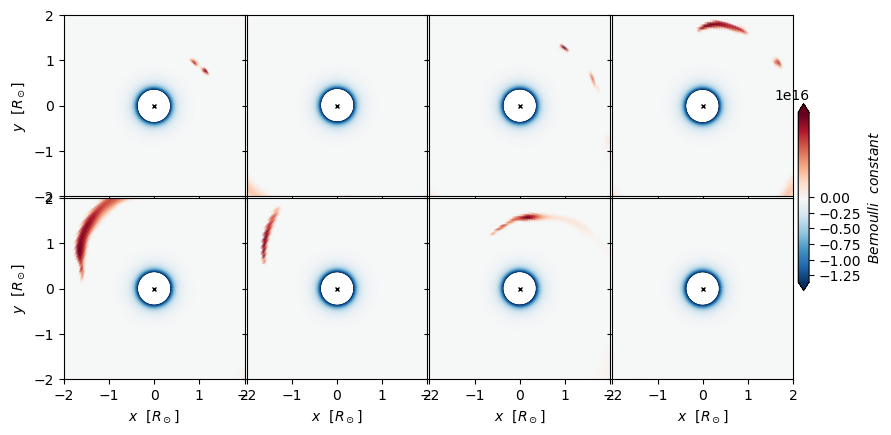

In [12]:
# plot unbounded mass by Bernoulli constant

base_dir = '../../data/planetary_engulfment_test15/'
fig_mm = 1/25.4 #figure size
Porb = 10000   # ? orbit period time
orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
sel = (orb['time']>75000) & (orb['time']<95000)    
tperi = orb[sel]['time'][ np.argmin(orb[sel]['sep']) ]
print('tperi = ',tperi)

filelist = []
start_id = 100
for id_name in range(8):
    datafile = base_dir + "PEGM.out1."+str(id_name*200+start_id).zfill(5)+".athdf"
    filelist.append(datafile)

thind = 0
mylevel = None
x2slicevalue=ou.get_midplane_theta(filelist[0],level=mylevel)

fig = plt.figure(figsize=(360*fig_mm,120*fig_mm))
grid = ImageGrid(fig,111,nrows_ncols=[2,4],
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size='3%',
                 cbar_pad=0.05)


r0thresh = 0.

    

for i,myfile in enumerate(filelist):
    gamma=1.66667
    d = ou.read_data(myfile,orb,gamma=gamma,level=mylevel,x2_min=x2slicevalue,x2_max=x2slicevalue,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

    x2,y2,z2 = ou.pos_secondary(orb,d['Time'])

    rcom,vcom = ou.rcom_vcom(orb,d['Time'])
    
    
    v_abs = np.sqrt(d['vel1']**2+d['vel2']**2+d['vel3']**2)
    r_phi = np.loadtxt(base_dir+"potential.dat")
    phi_interp = scipy.interpolate.interp1d(r_phi[:,0],r_phi[:,1])
    phi_r = phi_interp(d['x1v'])
    B = d['rho']*d['r0']*v_abs**2/2+d['rho']*d['r0']*phi_r+d['press']*(1+1/(gamma-1))
    
    
    ### DENSITY
    from matplotlib.colors import TwoSlopeNorm
    
    B_mid =ou.get_plot_array_midplane(np.where(d['r0'][:,thind,:]>r0thresh,(B)[:,thind,:],np.nan))
    print('max B is',np.max(B_mid))
    norm = TwoSlopeNorm(vmin = np.min(B_mid),vcenter=0,vmax=np.max(B_mid))

    im=grid[i].pcolormesh( ou.get_plot_array_midplane(d['x'][:,thind,:]-rcom[0])/r_star, 
                           ou.get_plot_array_midplane(d['y'][:,thind,:] -rcom[1])/r_star,
                           B_mid,
            norm = norm,cmap='RdBu_r',shading='gouraud',rasterized=True,zorder=0
            )
    #cb=grid.cbar_axes[0].colorbar(im,extend='both')
    cb=plt.colorbar(im,extend='both',cax=grid.cbar_axes[0],label=r'$Bernoulli \ \ constant$')
    #cb.set_label_text(r'$\log_{10}\left( \rho \right)$  [g cm$^{-3}$]')
    cb.solids.set_edgecolor('face')

    grid[i].set_ylim(-2,2)
    grid[i].set_xlim(-2,2)
    grid[i].plot([0],[0],'kx',markersize=3)

    grid[i].set_xlabel('$x \ \ [R_\odot]$')
    grid[i].set_ylabel('$y \ \ [R_\odot]$')

In [3]:
# plot unbounded mass by Bernoulli constant
def find_r(file, r_given):
    r_given_filelike = r_given*np.ones_like(file)
    r_index = np.argmin(np.abs(file-r_given_filelike))
    return r_index

def m_dot_parallel(i,myfile,phi_interp,gamma,rclist,m_dot_time,time):
    d = athdf(myfile)
    print(myfile+" file readed...")
    time[i] = d["Time"]
    
    v_abs = np.sqrt(d['vel1']**2+d['vel2']**2+d['vel3']**2)
    phi_r = phi_interp(d['x1v'])
    B = d['rho']*d['r0']*v_abs**2/2+d['rho']*d['r0']*phi_r+d['press']*(1+1/(gamma-1))
    
    ### caluculate the M_dot at rc
    for j,rc in enumerate(rclist):
        rc_index = find_r(d['x1v'],rc)
        d_theta = np.pi/d['rho'].shape[1]
        d_phi = 2*np.pi/d['rho'].shape[0]
        M_dot_tp = np.where(d['vel1'][:,:,rc_index]>0,(d['rho']*d['r0']*d['vel1'])[:,:,rc_index],0)
        #M_dot_tp = np.where(B[:,:,rc_index]>=0,M_dot_tp,0)
        M_dot_tp = np.dot(M_dot_tp,np.sin(d['x2v']))
        M_dot = np.sum(M_dot_tp)*rc**2*d_theta*d_phi
        
        m_dot_time_i = m_dot_time[i]
        m_dot_time_i[j] = M_dot
        m_dot_time[i] = m_dot_time_i
        

r_phi = np.loadtxt(base_dir+"potential.dat")
phi_interp = scipy.interpolate.interp1d(r_phi[:,0],r_phi[:,1])


filelist = []
start_id = 0
id_int = 10
for id_name in range(int(1500/id_int)):
    datafile = base_dir + "PEGM.out1."+str(id_name*id_int+start_id).zfill(5)+".athdf"
    filelist.append(datafile)


n_file = len(filelist)
gamma=1.66667
rclist = c.rsun*np.linspace(1.0,3.0,num=5)

"""
    Use multiprocessing.Process to parallel execution
"""
from multiprocessing import Pool,Array,Process,Manager
    
     
p_list = []
manager = Manager()
m_dot_time = manager.list(np.zeros((n_file,5),dtype=np.float64))
time = manager.list(np.zeros((n_file,),dtype=np.float64))
     
pool = Pool(20)
for i,myfile in enumerate(filelist):
    pool.apply_async(m_dot_parallel, args=(i,myfile,phi_interp,gamma,rclist,m_dot_time,time))
    
pool.close()
pool.join()
    
print("done!")

../../data/planetary_engulfment_test15/PEGM.out1.00030.athdf file readed...
../../data/planetary_engulfment_test15/PEGM.out1.00090.athdf file readed...../../data/planetary_engulfment_test15/PEGM.out1.00020.athdf file readed...
../../data/planetary_engulfment_test15/PEGM.out1.00120.athdf file readed...
../../data/planetary_engulfment_test15/PEGM.out1.00100.athdf file readed...
../../data/planetary_engulfment_test15/PEGM.out1.00080.athdf file readed...../../data/planetary_engulfment_test15/PEGM.out1.00180.athdf file readed...../../data/planetary_engulfment_test15/PEGM.out1.00040.athdf file readed...../../data/planetary_engulfment_test15/PEGM.out1.00000.athdf file readed...
../../data/planetary_engulfment_test15/PEGM.out1.00010.athdf file readed...../../data/planetary_engulfment_test15/PEGM.out1.00070.athdf file readed...../../data/planetary_engulfment_test15/PEGM.out1.00190.athdf file readed...../../data/planetary_engulfment_test15/PEGM.out1.00170.athdf file readed...

../../data/planeta

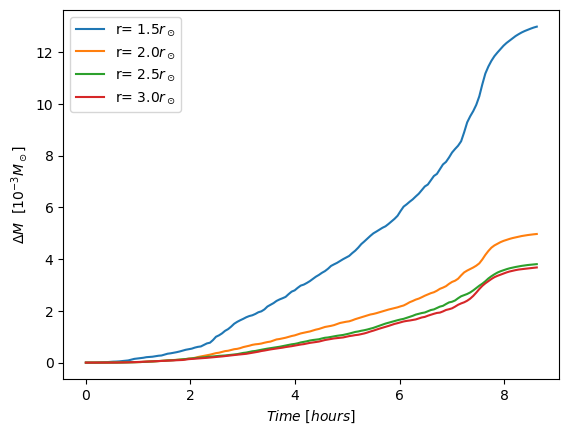

In [16]:
# calculate the cumulated mass loss
time_post = np.array(time)
m_dot_time_post = np.array(m_dot_time)

n_time = np.shape(m_dot_time_post)[0]
n_line = np.shape(m_dot_time_post)[1]
delta_M = np.zeros((n_time,n_line))
for i in range(n_time-1):
    delta_M[i+1,:] = delta_M[i,:]+(m_dot_time_post[i,:]+m_dot_time_post[i+1,:])/2*(time[i+1]-time[i])
    
fig,ax = plt.subplots()

for i in np.linspace(1,4,num=4,dtype=int):
    ax.plot(time_post/3600/24,delta_M[:,i]/c.msun*10**3,label=r"r= %.1f$r_\odot$" %(i*0.5+1))
ax.set_xlabel('$Time\\ [hours]$')
ax.set_ylabel('$\Delta M \ \ [10^{-3} M_\odot]$')
ax.legend()

In [55]:
def get_interp_function(d,var,rescale_factor=1,method='linear'):
    """
    MM: Use RegularGridInterpolator to pass data to interpolating function for a given variable
    Parameters
    -----------
    d : dict
       athena data dict from read_data
    var: str
       name of variable to be interpolated
       
    Returns
    --------
    var_interp: an interpolating function that can be called with a tuple (phi,theta,r)
    """
    dph = np.gradient(d['x3v'])[0]
    dtheta = np.gradient(d['x2v'])[0]
    two_pi = ( (d['x3v'][-1]-d['x3v'][0]+dph) /(2*np.pi) > 0.99 ) # boolean to determine if spans 2pi in phi
    x1v = d['x1v']*rescale_factor
    var_shape = d[var].shape
    
    if two_pi:
        x3v = np.append(d['x3v'][0]-dph,d['x3v'])
        x3v = np.append(x3v,x3v[-1]+dph)
        var_data = np.append([d[var][-1]],d[var],axis=0)
        var_data = np.append(var_data,[var_data[0]],axis=0)
        var_shape = var_data.shape
    else:
        x3v = d['x3v']
        var_data = d[var]
        
    # extend in theta
    x2v = np.append(d['x2v'][0]-dtheta,d['x2v'])
    x2v = np.append(x2v,x2v[-1]+dtheta)
    var_data = np.append(var_data[:,0,:].reshape(var_shape[0],1,var_shape[2]),var_data,axis=1)
    var_data = np.append(var_data,var_data[:,-1,:].reshape(var_shape[0],1,var_shape[2]),axis=1)
        
    var_interp = RegularGridInterpolator((x3v,x2v,x1v),var_data,bounds_error=False,method=method)
    return var_interp

def cart_to_polar(x,y,z):
    """cartesian->polar conversion (matches 0<phi<2pi convention of Athena++)
    Parameters
    x, y, z
    Returns
    r, th, phi
    """
    r = np.sqrt(x**2 + y**2 +z**2)
    th = np.arccos(z/r)
    phi = np.arctan2(y,x)
    phi = np.where(phi>=0,phi,phi+2*np.pi)
    return np.stack((r, th, phi), axis=2)

def mesh_interpolate_at_xyzpoints(d,var,points):
    """
    MM: convience function to interpolate a variable to mesh points
    Parameters
    -----------
    d: athena++ data dict
    var: str variable name in, e.g. "rho"
    points: array of cartesian positions (eg vertices or centroids) (n,n,3) floats (x,y,z)
    """
    var_interp = get_interp_function(d,var)
    rp,thp,php = cart_to_polar(points[:,:,0],points[:,:,1],points[:,:,2])
    return var_interp( (php,thp,rp) )


In [56]:
### integrate along radius from every solid angle
mylevel = None

# considering Hydrogen and ff opacity
def ff_opacity(rho, temp, wavelength):
    # in cgs unit
    opacity = 4.97*rho**2/temp**0.5*wavelength**3*1000
    return opacity

def Rosseland_mean_opacity(rho,temp):
    # in cgs unit
    opacity = 8e22*temp**(-7/2)*rho**2
    return opacity

def opac(rho,temp,X,Z):
    # in cgs units
    # molecules
    kappa_m = 0.1*Z
    
    # negative hydrogen ion
    kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
    
    # electron scattering
    kappa_e = 0.2*(1+X)/(1+2.7e11*rho/temp**2)/(1+(temp/4.5e8)**0.86)
    
    # Kramers formula
    kappa_K = 4e25*(1+X)*(Z+0.001)*rho/temp**3.5
    
    opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
    
    return opacity

def observer_grid(n, box_half_length = 1.0865e11, method = 'uniform',direction ='z'):
    #n*n*3 rectangle gird
    
    if method == 'uniform':
        obs_grid_xx = box_half_length*np.ones((n,n))
        pos_yy = np.linspace(-box_half_length, box_half_length, n)
        pos_zz = pos_yy
        obs_grid_yy,obs_grid_zz = np.meshgrid(pos_yy, pos_zz)
        
        if direction == 'x':
            obs_grid = np.stack((obs_grid_xx, obs_grid_yy, obs_grid_zz), axis=2)
            
        if direction == 'z':
            obs_grid = np.stack((obs_grid_yy, obs_grid_zz, obs_grid_xx), axis=2)
            
        if direction == 'y':
            obs_grid = np.stack((obs_grid_yy, obs_grid_xx, obs_grid_zz), axis=2)
    return obs_grid

def optical_depth(data, wavelength, obs_grid, rescale_factor=1, dx = -1, direction = 'x',plot = True):
    """Marching the obs_grid along given direction to find the photo-spheric position
    
    Parameters:
    -------
    data: athena++ data dict
    wavelength: observer wavelength in nm
    obs_grid: observer grid, (n,n) matrix
    direction: observer direction: 'x','y','z'; all from positive axis to negtive
    
    Returns: (n,n,3) array with photo-spheric position in cartesian coordinates, found with coordinate<9*domain_size, not found with
    coordinate=10*domain size
    """
    
    ## initializition
    n = len(obs_grid)
    op_dep = np.zeros((n,n))
    marching_box_xyz = obs_grid.copy()
    
    # computitional domain size
    domain_size = np.max(obs_grid)
    #print(domain_size)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    pho_position = np.ones((n,n,3))*domain_size*10
    
    ## get interpolation function
    rho_star = data['rho']*data['r0']/rescale_factor**2
    rho_star_dict = {'rho_star':rho_star}
    data.update(rho_star_dict)
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    temp = data['press']/data['rho']*c.mp/2/c.kB/rescale_factor
    temp_dict = {'temp':temp}
    data.update(temp_dict)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    if dx == -1:
        dx = cell_size/10
        
    if direction == 'x':
        marching_pos = np.min(marching_box_xyz[:,:,0])
    if direction == 'y':
        marching_pos = np.min(marching_box_xyz[:,:,1])
    if direction == 'z':
        marching_pos = np.min(marching_box_xyz[:,:,2])
        
    # use success matrix to determine if the line of sight is on the star,-1 for no, 1 for yes, 0 for first success
    success= -1*np.ones((n,n)) 
        
    #print('marching_pos', marching_pos)
    while marching_pos>-domain_size:
        # get density and temperature to get opacity
        marching_box_rtp = cart_to_polar(marching_box_xyz[:,:,0],marching_box_xyz[:,:,1],marching_box_xyz[:,:,2])
        rho_box = interp_rho((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
        rho_box = np.where(np.isnan(rho_box), 10**10, rho_box)
        #print(rho_box)
        temp_box = interp_temp((marching_box_rtp[:,:,2],marching_box_rtp[:,:,1],marching_box_rtp[:,:,0]))
            
        # integral optical depth
        #op_dep_new = op_dep + ff_opacity(rho_box,temp_box,wavelength)*dx
        #op_dep_new = op_dep + Rosseland_mean_opacity(rho_box,temp_box)*dx
        op_dep_new = op_dep + opac(rho_box,temp_box,0.7,0.02)*dx
        
        op_dep = np.where(op_dep>=1,op_dep,op_dep_new)
        #print(ff_opacity(rho_box,temp_box,wavelength))
        #print(temp_box)
        success = np.where(op_dep>=1,success+1,success)
            
        #if np.any(success== 0.):
            #print('success')
        
        # marching half step
        marching_pos = marching_pos-dx/2
        if direction == 'x':
            marching_box_xyz[:,:,0] -= dx/2
        if direction == 'y':
            marching_box_xyz[:,:,1] -= dx/2
        if direction == 'z':
            marching_box_xyz[:,:,2] -= dx/2
            
        # if first success, restore the success coordinates
        pho_position[:,:,0] = np.where(success == 0.,marching_box_xyz[:,:,0],pho_position[:,:,0])
        pho_position[:,:,1] = np.where(success == 0.,marching_box_xyz[:,:,1],pho_position[:,:,1])
        pho_position[:,:,2] = np.where(success == 0.,marching_box_xyz[:,:,2],pho_position[:,:,2])
                
        # marching half step
        marching_pos = marching_pos-dx/2
        if direction == 'x':
            marching_box_xyz[:,:,0] -= dx/2
        if direction == 'y':
            marching_box_xyz[:,:,1] -= dx/2
        if direction == 'z':
            marching_box_xyz[:,:,2] -= dx/2
        
            
        success = np.where(success>=1,1,success)
            
       
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    #pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
    #pho_radius = np.where(pho_radius>10,0,pho_radius)
    # plot
    if plot: 
        pho_radius = (pho_position[:,:,0]**2+pho_position[:,:,1]**2+pho_position[:,:,2]**2)**0.5/c.rsun
        pho_radius = np.where(pho_radius>9.9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
        if direction =='x':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.imshow(pho_radius)
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Photosphere radius Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return pho_position

def Blackbody(wavelength,temp):
    """
    Planck blackbody emission, in cgs units, wavelength in nm
    """
    a = 2*c.h*c.c**2
    b = c.h*c.c/(wavelength*1e-7)/c.kB/temp
    return a/(wavelength*1e-7)**5/(np.exp(b)-1.0)


def flux(data,pho_pos,grid,wavelength,rescale_factor=1,lum_bolo=False, plot = True, direction ='z'):
    """
    Synthetic photometry, Planck blackbody emission flux
    """
    
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    domain_size = np.max(ob_grid)
    pho_radius = (pho_pos[:,:,0]**2+pho_pos[:,:,1]**2+pho_pos[:,:,2]**2)**0.5/c.rsun
    pho_radius = np.where(pho_radius>9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
    
    ## get interpolation function
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    
    # computitional domain size
    domain_size = np.max(grid)
    n = len(grid)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    
    # flux intensity 
    pho_pos_rtp = cart_to_polar(pho_pos[:,:,0],pho_pos[:,:,1],pho_pos[:,:,2])
    pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    #print(pho_temp)
    #print(interp_rho((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0])))
    if lum_bolo:
        flux_intensity = pho_temp**4*c.sigmaSB
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    else:
        flux_intensity = Blackbody(wavelength, pho_temp)
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    
    #print(np.where(pho_temp>1e15,pho_radius,0))
    
    # plot
    if plot: 
        if direction =='x':
            plt.pcolor(grid[0,:,1]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,2]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,1]/c.rsun,flux, cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return flux

def temp_flux(data,pho_pos,grid,wavelength,rescale_factor=1,plot = True, direction ='z'):
    """
    Synthetic photometry, Planck blackbody emission flux
    """
    
    # using the radius to say the photo-spheric radius at the surface or not(0.9R_S--1.1R_S)
    domain_size = np.max(ob_grid)
    pho_radius = (pho_pos[:,:,0]**2+pho_pos[:,:,1]**2+pho_pos[:,:,2]**2)**0.5/c.rsun
    pho_radius = np.where(pho_radius>9*(domain_size/c.rsun)*rescale_factor,0,pho_radius)
    
    ## get interpolation function
    interp_rho = get_interp_function(data,'rho_star',rescale_factor=rescale_factor)
    interp_temp = get_interp_function(data,'temp',rescale_factor=rescale_factor)
    
    # computitional domain size
    domain_size = np.max(grid)
    n = len(grid)
    cell_size = domain_size/(n-1)*2
    area = cell_size**2
    
    # flux intensity 
    pho_pos_rtp = cart_to_polar(pho_pos[:,:,0],pho_pos[:,:,1],pho_pos[:,:,2])
    pho_temp = interp_temp((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0]))
    #print(pho_temp)
    #print(interp_rho((pho_pos_rtp[:,:,2],pho_pos_rtp[:,:,1],pho_pos_rtp[:,:,0])))
    
    flux_intensity = np.where(pho_radius==0,np.NAN,pho_temp)
    flux = flux_intensity
    
    #print(np.where(pho_temp>1e15,pho_radius,0))
    
    # plot
    if plot: 
        if direction =='x':
            plt.pcolor(grid[0,:,1]/c.rsun,grid[:,0,2]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$y \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='y':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,2]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Flux Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$z \ \ [R_\odot]$')
            plt.show()
        if direction =='z':
            plt.pcolor(grid[0,:,0]/c.rsun,grid[:,0,1]/c.rsun,np.log10(flux), cmap='inferno')
            plt.colorbar()  # Add a color bar to show the scale
            plt.title('Temperature Plot')
            plt.xlabel('$x \ \ [R_\odot]$')
            plt.ylabel('$y \ \ [R_\odot]$')
            plt.show()
        
    return flux

def integrated_luminosity(id_order):
    """
    Sum the flux to get integrated luminosity
    """
    # read data
    id_name = id_order+start_id
    datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                    get_energy=False,profile_file=dirname+'polytrope.dat')
    time = data['Time']
        
    pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
    flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
    int_lum = np.sum(flux_con)
    
    return int_lum, time
    
def light_curve(dirname, start_time, end_time, time_incre, wavelength, grid_size, plot = True, direction ='z'):
    """
    Temporal evolution of the integrated luminosity
    """
    
    # find data file by time and loop over files
    start_id = round(start_time/time_incre)-10
    end_id = round(end_time/time_incre)+10
    file_num = end_id-start_id+1
    
    lum_time = np.zeros(file_num)
    time = np.zeros(file_num)
    
    ob_grid=observer_grid(grid_size,direction=direction) # should be fixed
    
    #from multiprocessing import Pool
    
    #with Pool(64) as p:
        #lum_time, time=p.map(integrated_luminosity, id_order,start_id,dirname,orb,mylevel,wavelength,ob_grid,direction)
        
    
   #""" 
    # Non-parrallel
    for id_order in range(file_num):
        # read data
        id_name = id_order+start_id
        datafile = dirname + "PEGM.out1."+str(id_name).zfill(5)+".athdf"
        data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')
        time[id_order] = data['Time']
        
        pho_pos = optical_depth(data,wavelength,ob_grid,direction=direction)
        flux_con = flux(data, pho_pos, ob_grid, wavelength,plot=False, direction=direction)
        int_lum = np.sum(flux_con)
        lum_time[id_order] = int_lum
   # """
    
    if plot:
        plt.plot(time,lum_time)
        plt.title('Light Curve')
        plt.xlabel('$Time$')
        plt.ylabel('$Luminosity$')
        plt.show()

In [64]:
base_dir = '../../data/planetary_engulfment_test35/'
myfile = base_dir+"PEGM.out1.00200.athdf"

data = ou.read_data(myfile,orb,gamma=1.66667,level=mylevel,
                       get_energy=False,profile_file=base_dir+'polytrope.dat')

r0_max = np.max(np.argmax(np.log10(data['r0'])<-15,axis=2))
r_max = data['x1v'][r0_max]
print(data['Time']/24/3600)

read_data...reading file ../../data/planetary_engulfment_test35/PEGM.out1.00200.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
1.1574130135995369


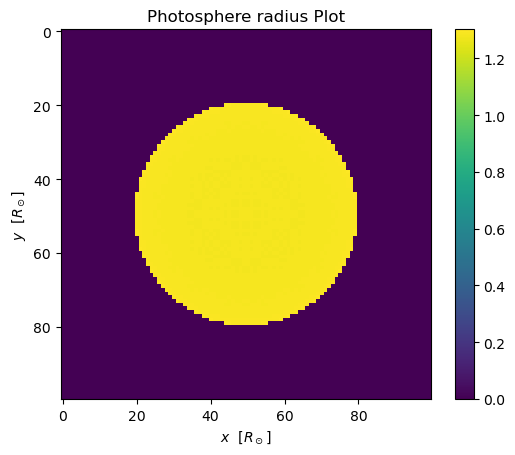

In [65]:
############
#rescale
rescale_factor = 1
############
direction='z'
ob_grid=observer_grid(100,box_half_length = r_max*1.5*rescale_factor,direction=direction)
wavelength = 800
pho_pos = optical_depth(data,wavelength,ob_grid,rescale_factor=rescale_factor,direction=direction)

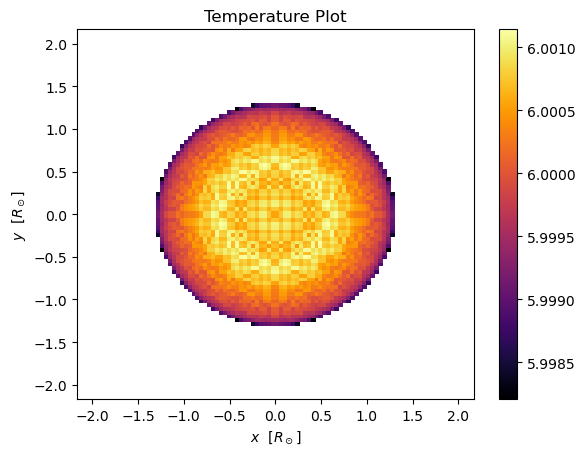

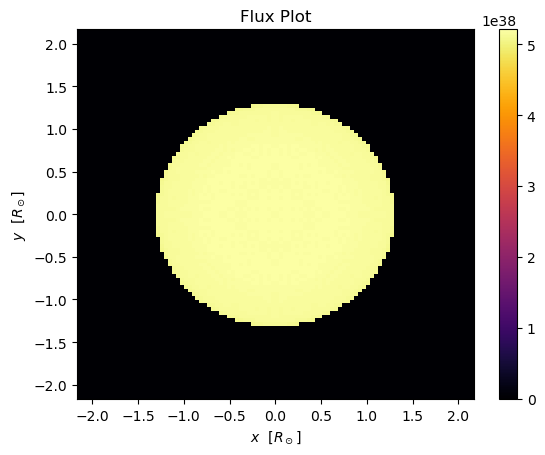

In [66]:
wavelength =10
flux_1 = temp_flux(data,pho_pos, ob_grid,wavelength,direction=direction)

flux_2 = flux(data, pho_pos, ob_grid, wavelength, lum_bolo=True,direction=direction)

In [6]:
def optical_depth_radial(data, wavelength, rescale_factor=1, dx = -1,plot = True):
    """Marching along the radial direction from outter boundary to find photosphere radii
    
    Parameters:
    -------
    data: athena++ data dict
    wavelength: observer wavelength in nm
    Returns: 
    (n_phi,n_theta) array with photosphere radii('x1v') of each solid angle interval
    (n_phi,n_theta) array with photosphere radii id of each solid angle interval 
    """
    
    ## initializition
    n_theta = len(data['x2v'])
    n_phi   = len(data['x3v'])
    op_dep = np.zeros((n_phi,n_theta))
    pho_radii = np.ones((n_phi,n_theta))*data['x1v'][-1]
    pho_id    = np.ones((n_phi,n_theta))*int(len(data['x1v'])-1)
    op_dep_id = int(len(data['x1v'])-1)
    
    # use success matrix to determine if the line of sight is on the star,-1 for no, 1 for yes, 0 for first success
    success= -1*np.ones((n_phi,n_theta)) 
    
    ## get data
    rho_star = data['rho']*data['r0']
    temp = data['press']/data['rho']*c.mp*1.25/2/c.kB

    while np.any(success==-1):
        
        rho_box  = rho_star[:,:,op_dep_id]
        temp_box = temp[:,:,op_dep_id]
            
        dx = data['x1f'][op_dep_id+1]-data['x1f'][op_dep_id]
            
        op_dep_new = op_dep + opac(rho_box,temp_box,0.7,0.02)*dx
        op_dep = np.where(op_dep>=1,op_dep,op_dep_new)
        success = np.where(op_dep>=1,success+1,success)
        
        # if first success, restore the success coordinates
        pho_radii = np.where(success==0,data['x1v'][op_dep_id],pho_radii)
        pho_id = np.where(success==0,op_dep_id,pho_id)
        
        #marching
        op_dep_id -= 1
        success = np.where(success>=1,1,success)
        
            
    # plot
    if plot: 
        plt.imshow(pho_radii.T/c.rsun)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Photosphere radius Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()
        
    return pho_radii,pho_id

def flux_radial(data,pho_radii,pho_id,wavelength,rescale_factor=1,lum_bolo=False, plot = True, temp_plot = True):
    """
    Synthetic photometry, Planck blackbody emission flux
    F=\sigma*T^4*d\theta*d\phi*sin(theta)*r^2
    """
    
    ## initializition
    n_theta = len(data['x2v'])
    n_phi   = len(data['x3v'])
    rho_star = data['rho']*data['r0']
    temp = data['press']/data['rho']*c.mp*1.25/2/c.kB
    pho_temp = np.zeros_like(pho_radii,dtype=float)
    flux = np.zeros_like(pho_radii,dtype=float)
    
    for ii in range(n_phi):
        for jj in range(n_theta):
            r_id = int(pho_id[ii,jj])
            pho_temp[ii,jj] = temp[ii,jj,r_id]
            
    area = np.pi/n_theta*2*np.pi/n_phi*np.outer(np.ones(n_phi),np.sin(data['x2v']))*pho_radii**2
    pho_aver_radii = np.sqrt(np.sum(area)/4/np.pi)
    
    if lum_bolo:
        flux_intensity = pho_temp**4*c.sigmaSB
        flux = flux_intensity*area
    else:
        flux_intensity = Blackbody(wavelength, pho_temp)
        flux_intensity = np.where(pho_radius==0,0,flux_intensity)
        flux = flux_intensity*area
    pho_aver_temp = (np.sum(flux)/np.sum(area)/c.sigmaSB)**0.25        
    
    # plot
    if plot: 
        plt.imshow(flux.T)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Flux Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()
        
    if temp_plot:
        plt.imshow(pho_temp.T)
        plt.colorbar()  # Add a color bar to show the scale
        plt.title('Photosphere temperature Plot')
        plt.xlabel('$phi$')
        plt.ylabel('$theta$')
        plt.show()

    return flux,pho_aver_radii,pho_aver_temp

In [7]:
def light_curve_radial_parallel(id_name, start_id, wavelength, time, int_lum, radii_aver, temp_aver):
    """
    Temporal evolution of the integrated luminosity(parallel execution)
    ----
    Argments: tuple of (id_name, wavelength)
    """
    
    
    orb = ou.read_trackfile(base_dir+"pm_trackfile.dat")
    mylevel = None
    
    datafile = base_dir + "PEGM.out1."+str(id_name*5+start_id).zfill(5)+".athdf"
    data = ou.read_data(datafile,orb,gamma=1.66667,level=mylevel,
                get_energy=False,profile_file=base_dir+'polytrope.dat')
    
    op_radii,op_id = optical_depth_radial(data, wavelength,plot=False)
    flux,radii,temp = flux_radial(data,op_radii,op_id,wavelength,lum_bolo=True,plot = False, temp_plot = False)
    time[id_name] = data['Time']
    int_lum[id_name] = np.sum(flux)
    radii_aver[id_name] = radii
    temp_aver[id_name] = temp
    
    
def light_curve_radial_parallel_plot(plot_num, start_id, wavelength):
    """
    Use multiprocessing.Process to parallel execution
    """
    from multiprocessing import Pool,Array,Process,Manager
    
     
    p_list = []
    manager = Manager()
    time = manager.Array('d',np.arange(plot_num))
    int_lum = manager.Array('d',np.arange(plot_num))
    radii_aver = manager.Array('d',np.arange(plot_num))
    temp_aver = manager.Array('d',np.arange(plot_num))
     
    pool = Pool(20)
    for i in np.arange(plot_num):
        pool.apply_async(light_curve_radial_parallel, args=(i,start_id,wavelength, time, int_lum, radii_aver, temp_aver))
    
    pool.close()
    pool.join()
    '''
    for i in np.arange(plot_num):
        p = Process(target = light_curve_parallel, args=(i,start_id,wavelength,grid_size,direction, time, int_lum))
        p.daemon=True
        p_list.append(p)
    
    for p in p_list:
        p.start()
    for p in p_list:
        p.join()
    '''
    
    print('done!')
    return time, int_lum, radii_aver,temp_aver

In [8]:
import time

start_time =time.time()
base_dir = '../../data/planetary_engulfment_test15/'
time_lc_15, int_lum_15, radii_aver_15,temp_aver_15=light_curve_radial_parallel_plot(150,0,800)
base_dir = '../../data/planetary_engulfment_test27/'
time_lc_27, int_lum_27, radii_aver_27,temp_aver_27=light_curve_radial_parallel_plot(150,0,800)
base_dir = '../../data/planetary_engulfment_test28/'
time_lc_28, int_lum_28, radii_aver_28,temp_aver_28=light_curve_radial_parallel_plot(150,0,800)
print(time.time()-start_time)

reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...reading orbit file for binary simulation...

reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00060.athdfread_data...reading file
 ../../data/planetary_engulfment_test15/PEGM.out1.00040.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00095.athdf
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00090.athdf
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00010.athdf
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00000.athdf
read_data...reading file ../../data/planetar

/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


...getting cartesian arrays...
...getting cartesian arrays...
...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


...getting cartesian arrays...
...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered 

reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00100.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00105.athdf
reading orbit file for binary simulation...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00120.athdf
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00130.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00125.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00145.athdf
reading orbit file for binary simulation...
reading orbit file for binary simulation...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00110.athdf
re

 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma=  ...file read, constructing arrays1.66667

 ...gamma= 1.66667
...getting cartesian arrays......getting cartesian arrays...

reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test15/PEGM.out1.00500.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667 ...file read, constructing arrays

 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
reading orbit file for binary simulation...
 ...file read, constructing arrays
 ...gamma= 1.66667
read_da

/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667


/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: overflow encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho


 ...file read, constructing arrays


/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: divide by zero encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho


 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 

/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


1.66667


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


...getting cartesian arrays...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.out1.00100.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: overflow encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: divide by zero encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
/tmp/ipykernel_1393604/45754604.

reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.out1.00105.athdf


/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: overflow encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho


reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.out1.00115.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.out1.00120.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.out1.00110.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.out1.00125.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.out1.00130.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.out1.00135.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.out1.00140.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_

...getting cartesian arrays...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.out1.00505.athdf
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...
...getting cartesian arrays...
 ...file read, constructing arrays
 ...gamma= 1.66667
reading orbit file for binary simulation...
...getting cartesian arrays...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.out1.00510.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test27/PEGM.o

/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


 ...file read, constructing arrays
 ...gamma= 1.66667
...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7


...getting cartesian arrays...


/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered in power
  kappa_nH = 1.1e-25*Z**0.5*rho**0.5*temp**7.7
/tmp/ipykernel_1393604/45754604.py:21: RuntimeWarning: overflow encountered 

reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00100.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00105.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00110.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00115.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00120.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00125.athdf


/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: overflow encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho


reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00130.athdf


/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: divide by zero encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: overflow encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: overflow encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho


reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00135.athdf


/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: overflow encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: divide by zero encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: overflow encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: overflow encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho
/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: divide by zero encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho


reading orbit file for binary simulation...
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00145.athdf
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00140.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00150.athdf


/tmp/ipykernel_1393604/45754604.py:29: RuntimeWarning: overflow encountered in divide
  opacity = (kappa_m+1.0/(1.0/kappa_nH+1/(kappa_e+kappa_K)))*rho


reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00155.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00165.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00160.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00170.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00175.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00180.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00185.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_

read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00520.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00525.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00530.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00535.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00540.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00545.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00550.athdf
reading orbit file for binary simulation...
read_data...reading file ../../data/planetary_engulfment_test28/PEGM.out1.00555.athdf
read

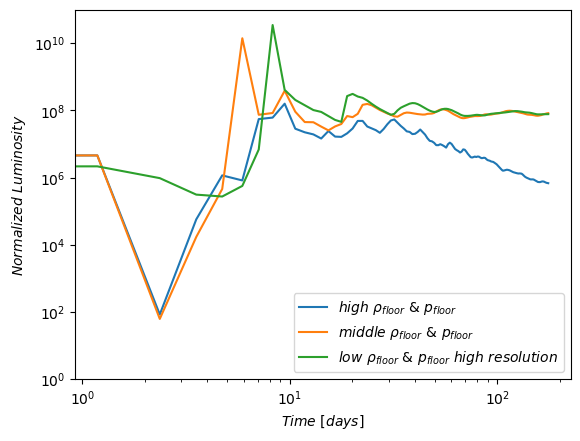

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.array(time_lc_15)/t_dyn,np.array(int_lum_15)/int_lum_15[0], label=r"$high\ \rho_{floor} \ & \ p_{floor}$")
ax.plot(np.array(time_lc_27)/t_dyn,np.array(int_lum_27)/int_lum_27[0], label=r"$middle\ \rho_{floor} \ & \ p_{floor}$")
ax.plot(np.array(time_lc_28)/t_dyn,np.array(int_lum_28)/int_lum_27[0], label=r"$low\ \rho_{floor} \ & \ p_{floor}\ high\ resolution$")
#ax.axvline(x=np.pi*(1.14e11**3/c.G/c.msun)**0.5/3600/24+2e3/3600/24)
ax.set_yscale('log')
ax.set_xlabel('$Time\\ [days]$')
ax.set_ylabel('$Normalized\\ Luminosity$')
#ax.set_xlim(0,4)
ax.set_xscale('log')
ax.set_ylim(1,1e11)
ax.legend()

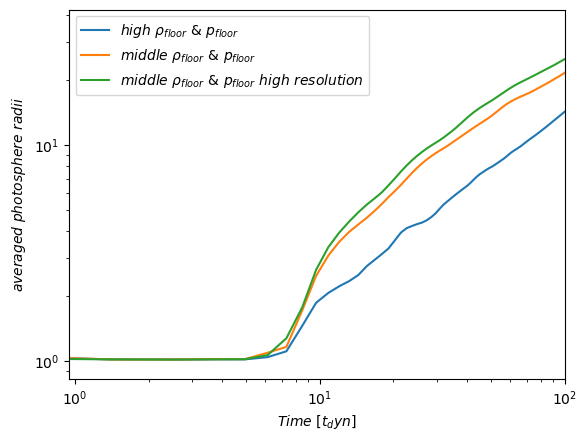

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.array(time_lc_15)/t_dyn-2e3/t_dyn,np.array(radii_aver_15)/radius, label=r"$high\ \rho_{floor} \ & \ p_{floor}$")
ax.plot(np.array(time_lc_27)/t_dyn-2e3/t_dyn,np.array(radii_aver_27)/radius, label=r"$middle\ \rho_{floor} \ & \ p_{floor}$")
ax.plot(np.array(time_lc_28)/t_dyn-2e3/t_dyn,np.array(radii_aver_28)/radius, label=r"$middle\ \rho_{floor} \ & \ p_{floor}\ high\ resolution$")
#ax.axvline(x=2e3/t_dyn)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$Time\\ [t_dyn]$')
ax.set_ylabel('$averaged\\ photosphere\\ radii$')
ax.set_xlim(2e3/t_dyn,1e2)
#ax.set_ylim(1,1e11)
ax.legend()
plt.show()